In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras import regularizers


In [3]:

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']



In [4]:

# Function to create the model
def make_model(_optimizer, _i) -> keras.Sequential:
    model = keras.Sequential(name=f'cancer_{_i}')
    model.add(keras.Input((xtrain.shape[1],)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=_optimizer,
        metrics=['accuracy']
    )

    model.summary()
    return model



In [5]:

# Create models for each optimizer
models = []
for i, optimizer in enumerate(optimizers):
    model = make_model(optimizer, i)
    models.append(model)

# Train the models and save the training history
# histories = []
# for i, model in enumerate(models):
#     histories.append(model.fit(xtrain, ytrain, epochs=50, batch_size=8, validation_split=0.2, verbose=0).history)
#     model.save(f'saved1/Q1/cancer_{i}.h5')
import time

# Train the models and save the training history
histories = []
for i, model in enumerate(models):
    timestamp = int(time.time())
    # file_path = f'saved1/Q1/cancer_{i}_{timestamp}.h5'
    histories.append(model.fit(xtrain, ytrain, epochs=50, batch_size=8, validation_split=0.2, verbose=0).history)
    # model.save(file_path)


# Evaluate the models and collect accuracy scores
acc_scores = []
hs = []
for i, model in enumerate(models):
    ypred = model.predict(xtest)
    ypred = (ypred > 0.5).astype(int).flatten()
    acc_scores.append(accuracy_score(ytest, ypred))

    hs.append({
        'acc': histories[i]['accuracy'],
        'val_acc': histories[i]['val_accuracy'],
        'loss': histories[i]['loss'],
        'val_loss': histories[i]['val_loss']
    })



Model: "cancer_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              31744     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 688,129
Trainable params: 688,129
Non-trainable params: 0
_________________________________________________________________
Model: "cancer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None

Adadelta: 0.89
Adagrad: 0.92
Adam: 0.89
RMSprop: 0.88
SGD: 0.37


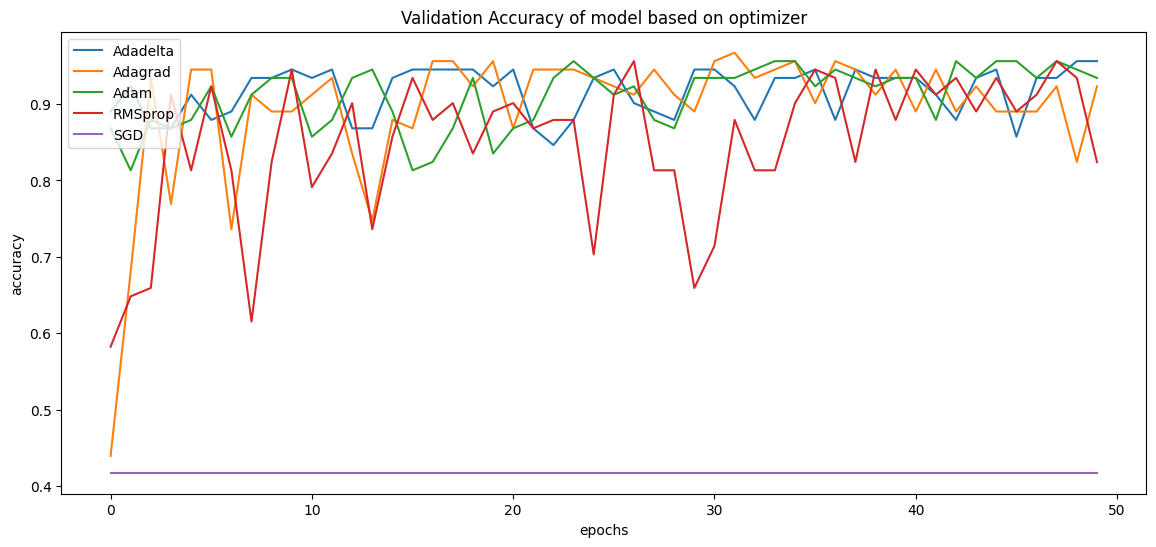

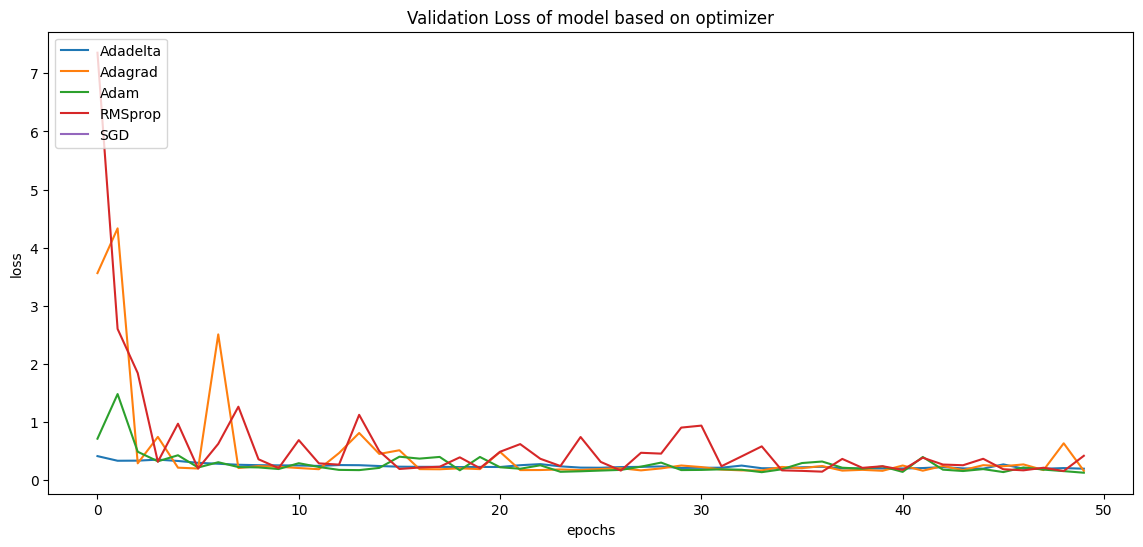

In [6]:
for i, optimizer in enumerate(optimizers):
    print(f'{optimizer}: {acc_scores[i]:.2f}')

# Plot accuracy over epochs for each optimizer
plt.figure(figsize=(14, 6))
for i in range(len(hs)):
    plt.plot(hs[i]['val_acc'])
plt.title('Validation Accuracy of model based on optimizer')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(optimizers, loc='upper left')
plt.show()

# Plot loss over epochs for each optimizer
plt.figure(figsize=(14, 6))
for i in range(len(hs)):
    plt.plot(hs[i]['val_loss'])
plt.title('Validation Loss of model based on optimizer')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(optimizers, loc='upper left')
plt.show()
